In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("MIDMARKS.xlsx")
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


### Dataset Description: `MIDMARKS.xlsx`

**Sheet Name:** `SEM2 MID 1 - ALPHA`

This dataset represents mid-semester marks for students in various subjects from a section named **ALPHA** of a second-semester class. Each row corresponds to a student, and each column indicates their score in a specific subject.

#### Columns:

| Column | Description |
|--------|-------------|
| `S.NO` | Serial number (indicates student position/order) |
| `SECTION` | The class section name (all values are "ALPHA") |
| `DV` | Marks in "Design and Visualization" (assumed subject) |
| `M-II` | Marks in "Mathematics-II" |
| `PP` | Marks in "Physics/Programming Principles" (ambiguous) |
| `BEEE` | Marks in "Basic Electrical and Electronics Engineering" |
| `FL` | Marks in "Foreign Language" or "Formal Languages" (context needed) |
| `FIMS` | Marks in "Foundations of Information Management Systems" or similar |

Total number of entries - **716**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     601 non-null    float64
 1   SECTION  691 non-null    object 
 2   DV       716 non-null    object 
 3   M-II     716 non-null    object 
 4   PP       716 non-null    object 
 5   BEEE     716 non-null    object 
 6   FL       715 non-null    object 
 7   FIMS     716 non-null    object 
dtypes: float64(1), object(7)
memory usage: 45.0+ KB


In [5]:
df.isnull().sum()

S.NO       117
SECTION     27
DV           2
M-II         2
PP           2
BEEE         2
FL           3
FIMS         2
dtype: int64

In [6]:
df.drop(df.tail(2).index,inplace=True)
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
711,NaN,ZETA,18,9,12,20,16,16
712,NaN,ZETA,15,10,7,18,18,16
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8


In [7]:
df.SECTION.value_counts()

ALPHA      90
BETA       90
DELTA      90
GAMMA      90
OMEGA      90
EPSILON    88
ZETA       88
SIGMA      63
Name: SECTION, dtype: int64

In [8]:
df["SECTION"]=df['SECTION'].fillna('SIGMA')
df.fillna(0)
df=df.replace("AB",0)
df=df.replace("A",0)
df=df.replace("MP",0)

In [9]:
df.dropna(how="all")

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0
...,...,...,...,...,...,...,...,...
711,NaN,ZETA,18.0,9.0,12.0,20.0,16.0,16.0
712,NaN,ZETA,15.0,10.0,7.0,18.0,18.0,16.0
713,NaN,ZETA,19.0,8.0,8.0,19.0,17.0,18.0
714,NaN,ZETA,12.0,1.0,7.0,10.0,20.0,8.0


In [11]:
df['S.NO']=range(1,len(df)+1)
df

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0
1,2,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0
2,3,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0
3,4,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0
4,5,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0
...,...,...,...,...,...,...,...,...
711,712,ZETA,18.0,9.0,12.0,20.0,16.0,16.0
712,713,ZETA,15.0,10.0,7.0,18.0,18.0,16.0
713,714,ZETA,19.0,8.0,8.0,19.0,17.0,18.0
714,715,ZETA,12.0,1.0,7.0,10.0,20.0,8.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.NO         716 non-null    int64  
 1   SECTION      716 non-null    object 
 2   DV           714 non-null    float64
 3   M-II         714 non-null    float64
 4   PP           714 non-null    float64
 5   BEEE         714 non-null    float64
 6   FL           713 non-null    float64
 7   FIMS         714 non-null    float64
 8   Total Marks  716 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 50.5+ KB


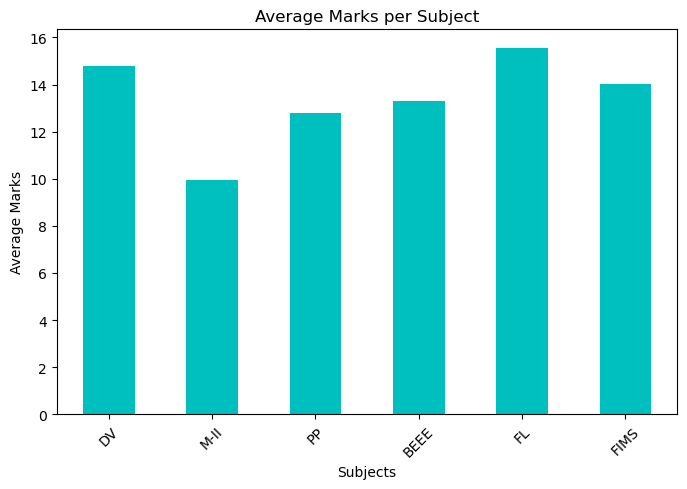

In [12]:
subject_means = df.iloc[:, 2:].mean()

plt.figure(figsize=(8, 5))
subject_means.plot(kind='bar', color='c')
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.title("Average Marks per Subject")
plt.xticks(rotation=45)
plt.show()


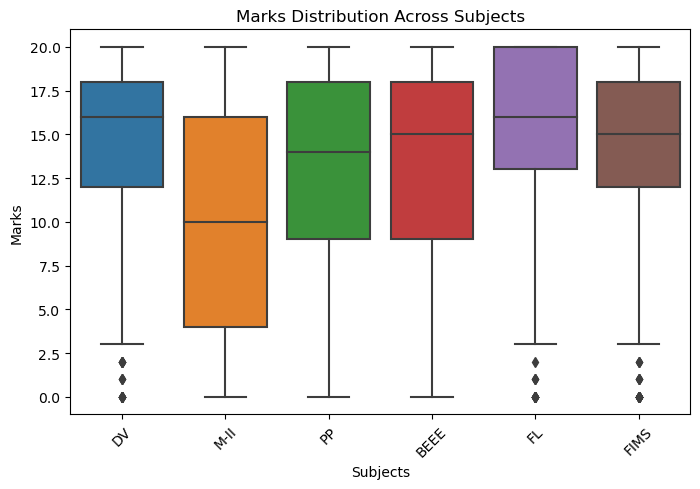

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df.iloc[:, 2:])
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.title("Marks Distribution Across Subjects")
plt.xticks(rotation=45)
plt.show()


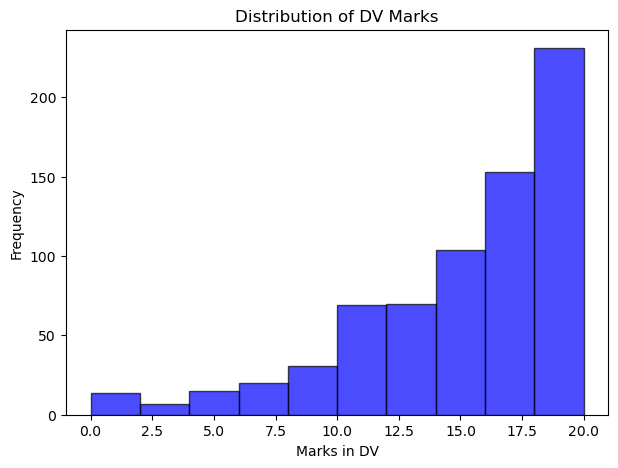

In [14]:
plt.figure(figsize=(7, 5))
plt.hist(df['DV'], bins=10, color='b', edgecolor='k', alpha=0.7)
plt.xlabel("Marks in DV")
plt.ylabel("Frequency")
plt.title("Distribution of DV Marks")
plt.show()


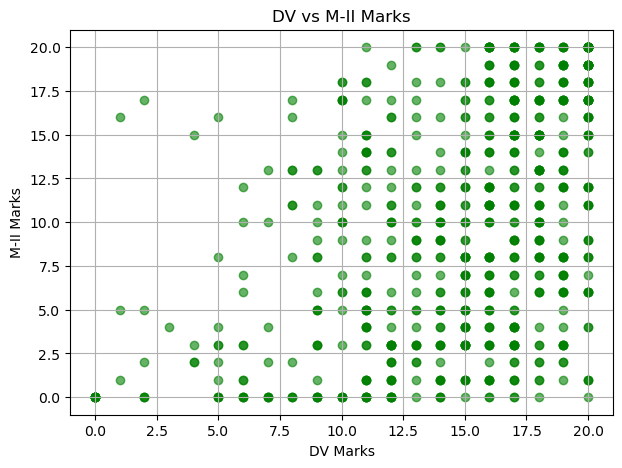

In [15]:
plt.figure(figsize=(7, 5))
plt.scatter(df["DV"], df["M-II"], color="g", alpha=0.6)
plt.xlabel("DV Marks")
plt.ylabel("M-II Marks")
plt.title("DV vs M-II Marks")
plt.grid(True)
plt.show()


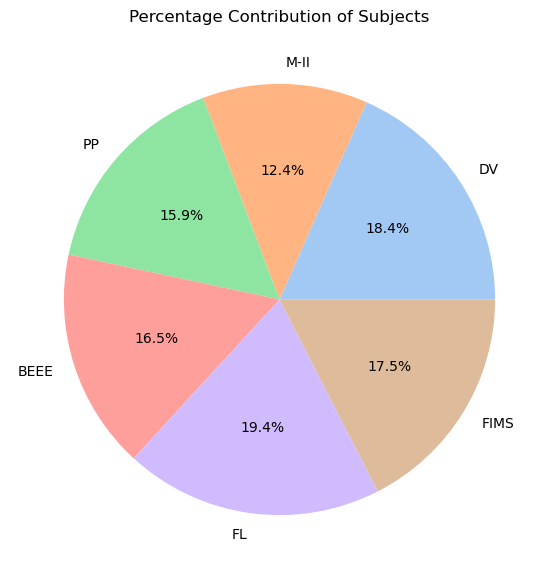

In [16]:
plt.figure(figsize=(7, 7))
plt.pie(subject_means, labels=subject_means.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Percentage Contribution of Subjects")
plt.show()


<Figure size 1000x500 with 0 Axes>

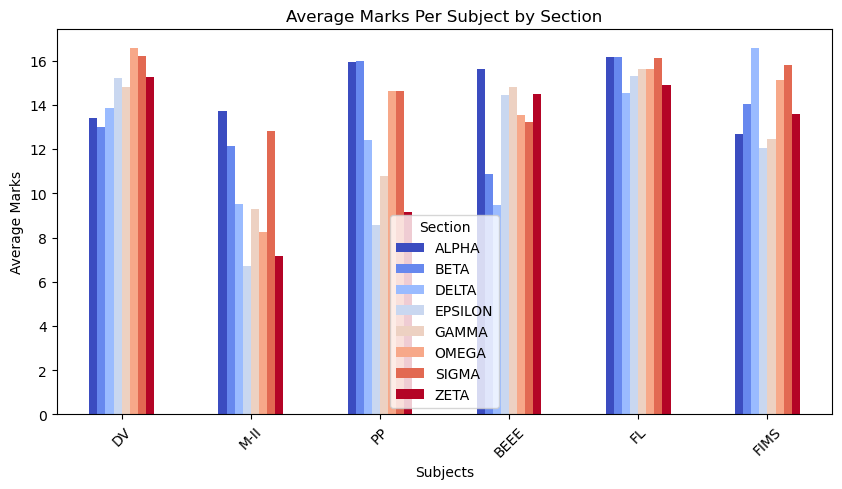

In [17]:
section_avg = df.groupby("SECTION").mean().iloc[:, 1:]
plt.figure(figsize=(10, 5))
section_avg.T.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.title("Average Marks Per Subject by Section")
plt.xticks(rotation=45)
plt.legend(title="Section")
plt.show()


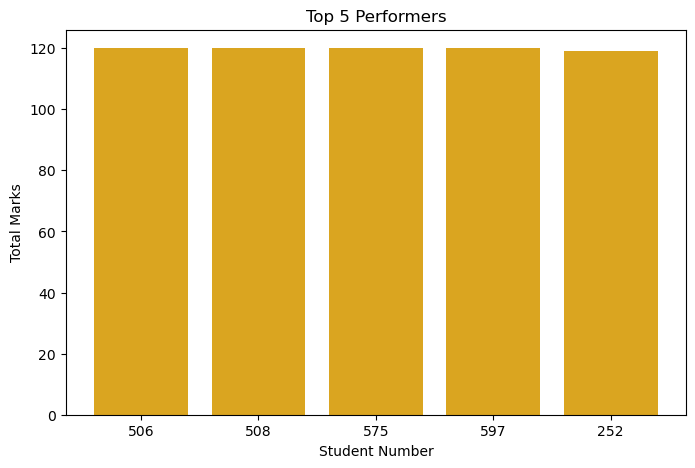

In [18]:
df["Total Marks"] = df.iloc[:, 2:].sum(axis=1)
top_5 = df.nlargest(5, "Total Marks")
plt.figure(figsize=(8, 5))
plt.bar(top_5["S.NO"].astype(str), top_5["Total Marks"], color='goldenrod')
plt.xlabel("Student Number")
plt.ylabel("Total Marks")
plt.title("Top 5 Performers")
plt.show()


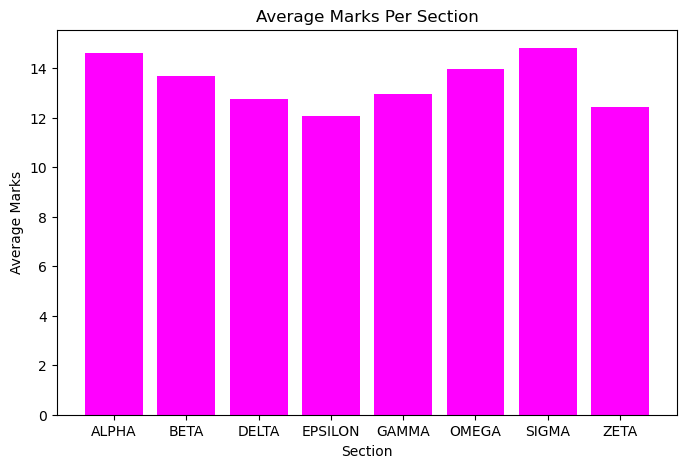

In [19]:
section_avg["Total Average"] = section_avg.mean(axis=1)
plt.figure(figsize=(8, 5))
plt.bar(section_avg.index, section_avg["Total Average"], color="magenta")
plt.xlabel("Section")
plt.ylabel("Average Marks")
plt.title("Average Marks Per Section")
plt.show()


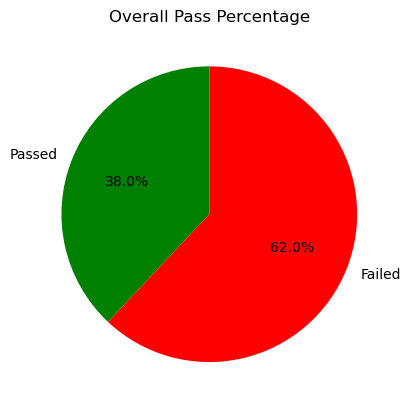

In [20]:
pass_mark = 10  
passed = sum((df.iloc[:, 2:] >= pass_mark).all(axis=1))
failed = len(df) - passed


plt.pie([passed, failed], labels=["Passed", "Failed"], autopct="%1.1f%%", colors=["green", "red"], startangle=90)
plt.title("Overall Pass Percentage")
plt.show()


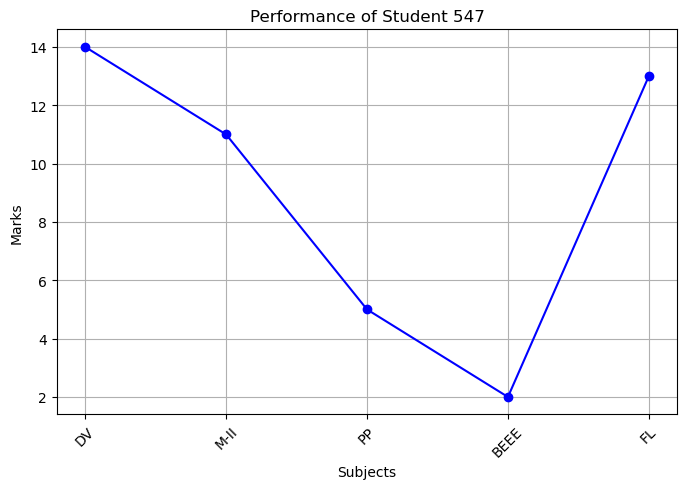

In [21]:
roll_no = 547
student_data = df[df["S.NO"] == roll_no].iloc[:, 2:7].T 
plt.figure(figsize=(8, 5))
plt.plot(student_data, marker="o", linestyle="-", color="b")
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.title(f"Performance of Student {roll_no}")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [22]:
aggregated_data=df.groupby(['SECTION']).mean()
aggregated_data

,S.NO,DV,M-II,PP,BEEE,FL,FIMS,Total Marks
SECTION,,,,,,,,
ALPHA,45.5,13.411111,13.711111,15.933333,15.622222,16.177778,12.700000,87.555556
BETA,135.5,13.000000,12.122222,15.966667,10.855556,16.157303,14.044444,81.966667
DELTA,225.5,13.866667,9.500000,12.422222,9.455556,14.555556,16.577778,76.377778
EPSILON,314.5,15.215909,6.693182,8.568182,14.431818,15.318182,12.068182,72.295455
GAMMA,403.5,14.811111,9.288889,10.777778,14.788889,15.633333,12.433333,77.733333
OMEGA,493.5,16.555556,8.266667,14.611111,13.522222,15.633333,15.100000,83.688889
SIGMA,583.5,16.227273,12.818182,14.613636,13.215909,16.136364,15.818182,86.855556
ZETA,672.5,15.250000,7.181818,9.159091,14.500000,14.875000,13.590909,74.556818


In [23]:
std_data=df.groupby(['SECTION']).std()
std_data

,S.NO,DV,M-II,PP,BEEE,FL,FIMS,Total Marks
SECTION,,,,,,,,
ALPHA,26.124701,4.991891,5.595432,5.343903,4.803037,3.808854,4.498314,23.435357
BETA,26.124701,3.815992,5.517750,4.251768,5.146311,3.437424,3.200811,18.773906
DELTA,26.124701,4.308862,6.385113,5.634919,5.694786,4.143795,3.798219,24.909985
EPSILON,25.547342,3.295587,6.010256,4.309293,4.949853,4.216948,4.745949,22.677732
GAMMA,26.124701,4.998639,6.258916,5.694030,5.854979,3.913245,4.709660,26.713966
OMEGA,26.124701,5.097060,6.375515,5.906946,6.179393,5.514944,5.081471,29.013613
SIGMA,26.124701,4.687296,6.723685,5.380749,5.663858,4.141691,4.795940,29.636586
ZETA,25.547342,3.884097,6.246922,4.204230,5.252257,5.735176,4.660019,24.742749


In [24]:
group1=df[df['SECTION']=='ALPHA']['DV']
print(group1)

0     12.0
1     19.0
2     18.0
3     15.0
4     18.0
      ... 
85     3.0
86    17.0
87    13.0
88     2.0
89    10.0
Name: DV, Length: 90, dtype: float64


In [25]:
group2=df[df['SECTION']=='BETA']['DV']
print(group2)

90     17.0
91     14.0
92     11.0
93     14.0
94     12.0
       ... 
175    14.0
176     6.0
177    12.0
178    16.0
179    15.0
Name: DV, Length: 90, dtype: float64


In [26]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(group1, group2, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.6207084248259586
P-value: 0.5356400219163465


In [27]:
from scipy.stats import ttest_1samp
t_stat,p_value=ttest_1samp(df[df['SECTION']=='ALPHA']['DV'],popmean=14.41)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.8983371142079486
P-value: 0.06089231604123776


In [28]:
from scipy.stats import ttest_rel
t_stat,p_value=ttest_rel(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.6677896583545824
P-value: 0.5059958752914141


In [29]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['DV'], df['M-II'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("\nContingency table:")
print(contingency_table)
print("\nExpected frequencies:")
print(expected)

alpha = 0.05
if p_value <= alpha:
    print(f"\nReject the null hypothesis (p-value: {p_value:.4f} <= {alpha})")
    print("There is a significant relationship between the variables.")
else:
    print(f"\nFail to reject the null hypothesis (p-value: {p_value:.4f} > {alpha})")
    print("There is no significant evidence of a relationship between the variables.")

Chi-squared statistic: 719.7412447048072
p-value: 1.361064431634623e-20
Degrees of freedom: 400

Contingency table:
M-II  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  11.0  \
DV                                                                ...         
0.0     11     0     0     0     0     0     0     0     0     0  ...     0   
1.0      0     1     0     0     0     1     0     0     0     0  ...     0   
2.0      3     0     1     0     0     1     0     0     0     0  ...     0   
3.0      0     0     0     0     1     0     0     0     0     0  ...     0   
4.0      0     0     2     1     0     0     0     0     0     0  ...     0   
5.0      4     1     1     2     1     0     0     0     1     0  ...     0   
6.0      4     2     0     2     0     0     1     1     0     0  ...     0   
7.0      4     0     1     0     1     0     0     0     0     0  ...     0   
8.0      3     0     1     0     0     0     0     0     1     0  ...     2   
9.0      5     